In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier

In [30]:
# Datasetimizi indirelim
df = pd.read_csv("Breast_cancer_data.csv")

In [31]:
# neye benzediğini görmek için ilk beş satıra bakalım, burada diagnosis 0 ve 1 diye hazır numaralandırıldığı için zaten logistic regresyona hazır durumda.
print(df.head())

   mean_radius  mean_texture  mean_perimeter  mean_area  mean_smoothness  \
0        17.99         10.38          122.80     1001.0          0.11840   
1        20.57         17.77          132.90     1326.0          0.08474   
2        19.69         21.25          130.00     1203.0          0.10960   
3        11.42         20.38           77.58      386.1          0.14250   
4        20.29         14.34          135.10     1297.0          0.10030   

   diagnosis  
0          0  
1          0  
2          0  
3          0  
4          0  


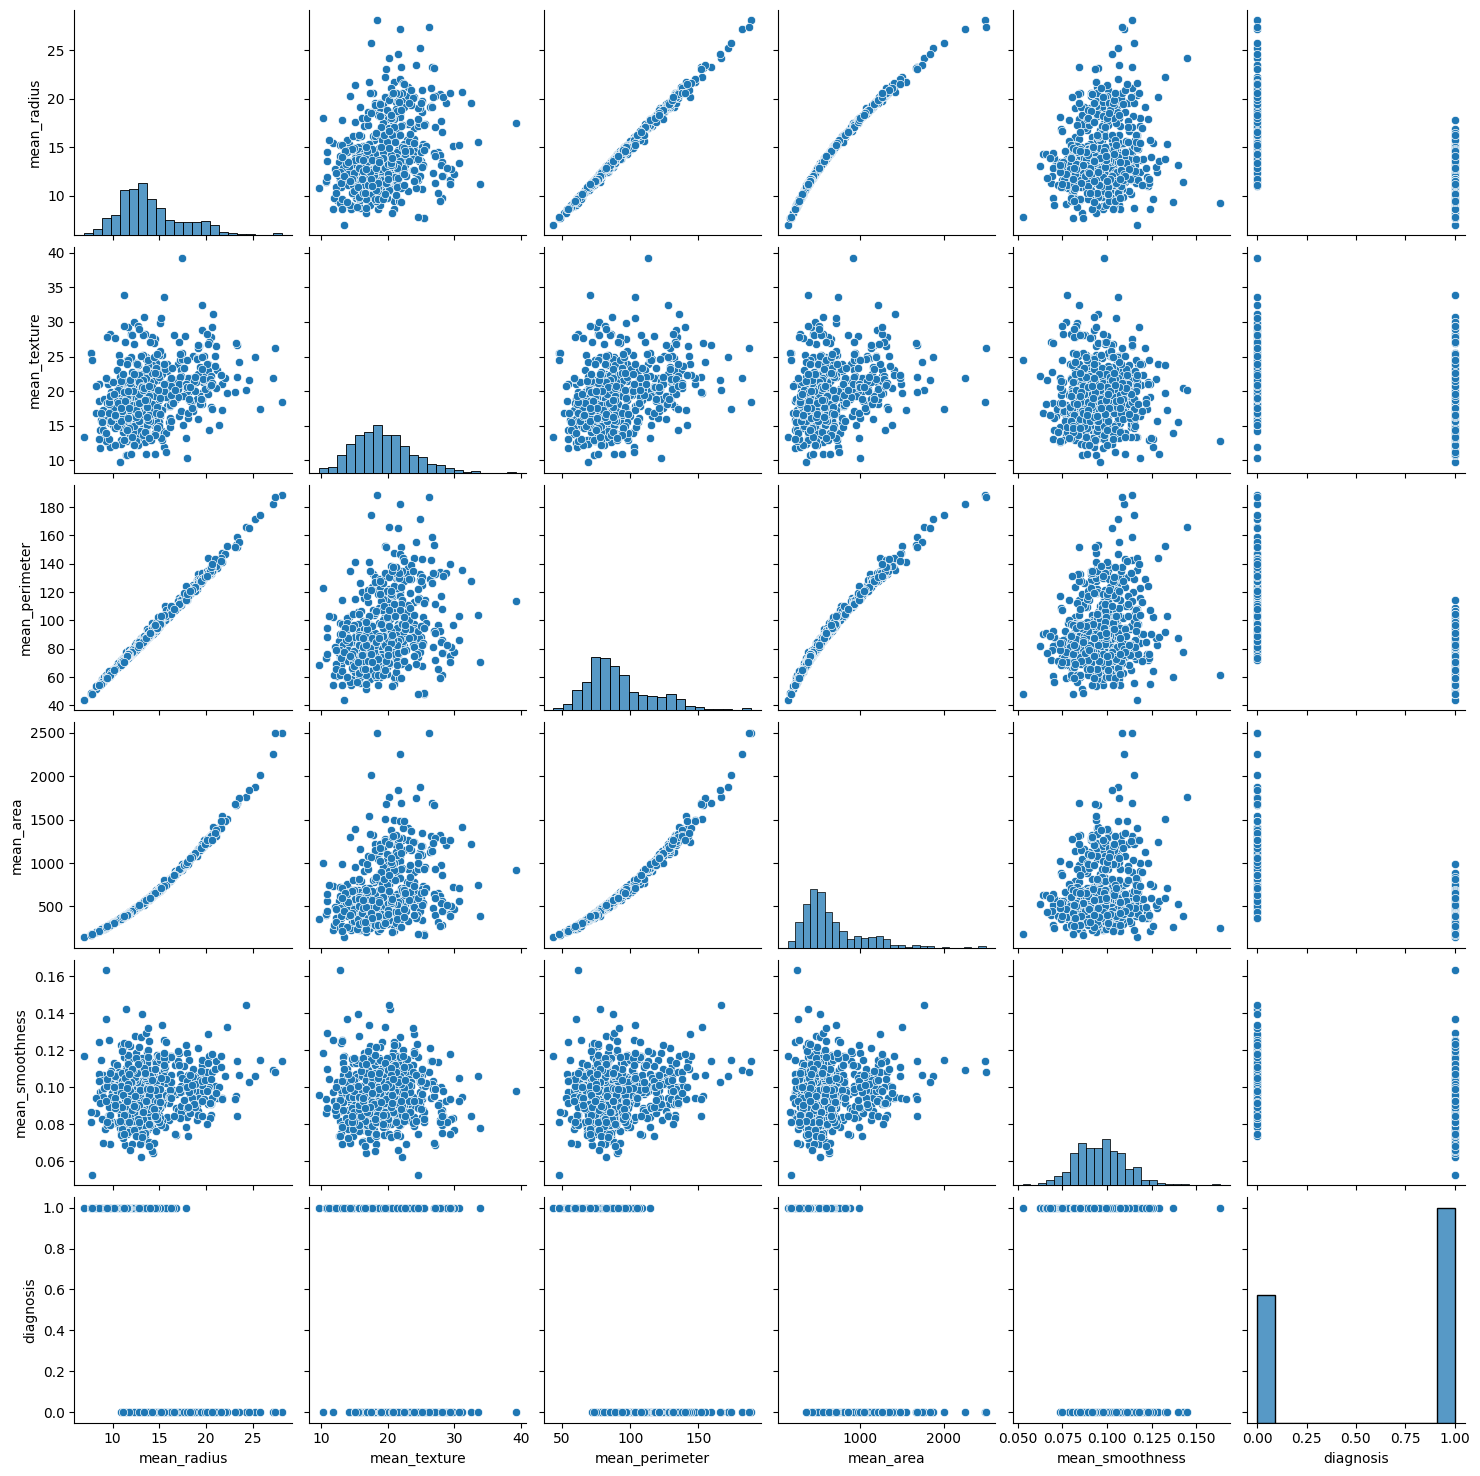

In [32]:
# ilişkilerine bakalım
sns.pairplot(df)
plt.show()

#Bunu görselleştirdikten sonra şunu açıkça söyleyebiliriz:

ortalama_çevre ve ortalama_yarıçap 
ortalama_alan ve ortalama_yarıçap
ortalama_alan ve ortalama_çevre oldukça ilişkili
Yani, ortalama_yarıçap ile yüksek korelasyona sahip olduğu için ortalama_çevre sütununu bırakırsak, aynı zamanda ortalama_alanı da düşürürüz.

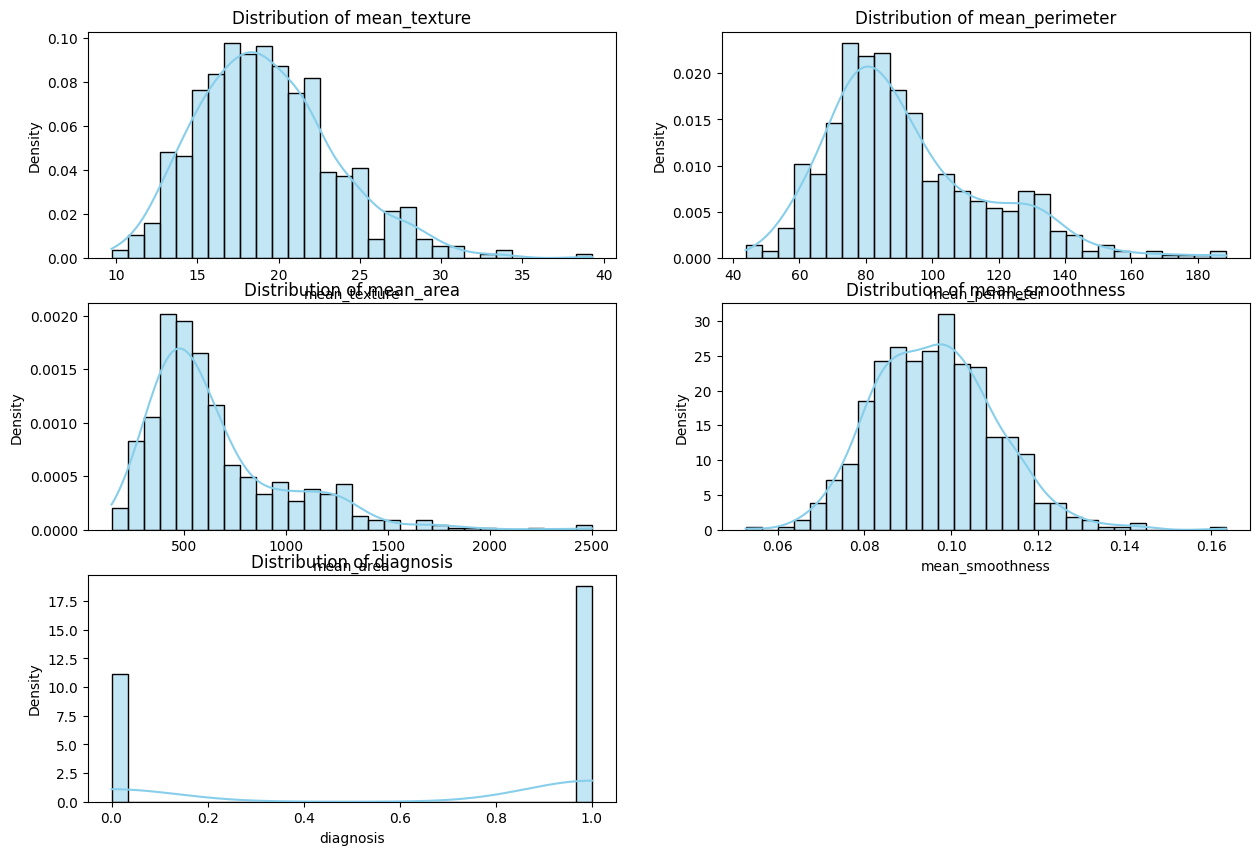

In [33]:
# Dağılımı görselleştirelim:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[1:6], start=1):
    plt.subplot(3, 2, i)
    sns.histplot(df[feature], kde=True, bins=30, color='skyblue', stat='density')
    plt.title(f'Distribution of {feature}')

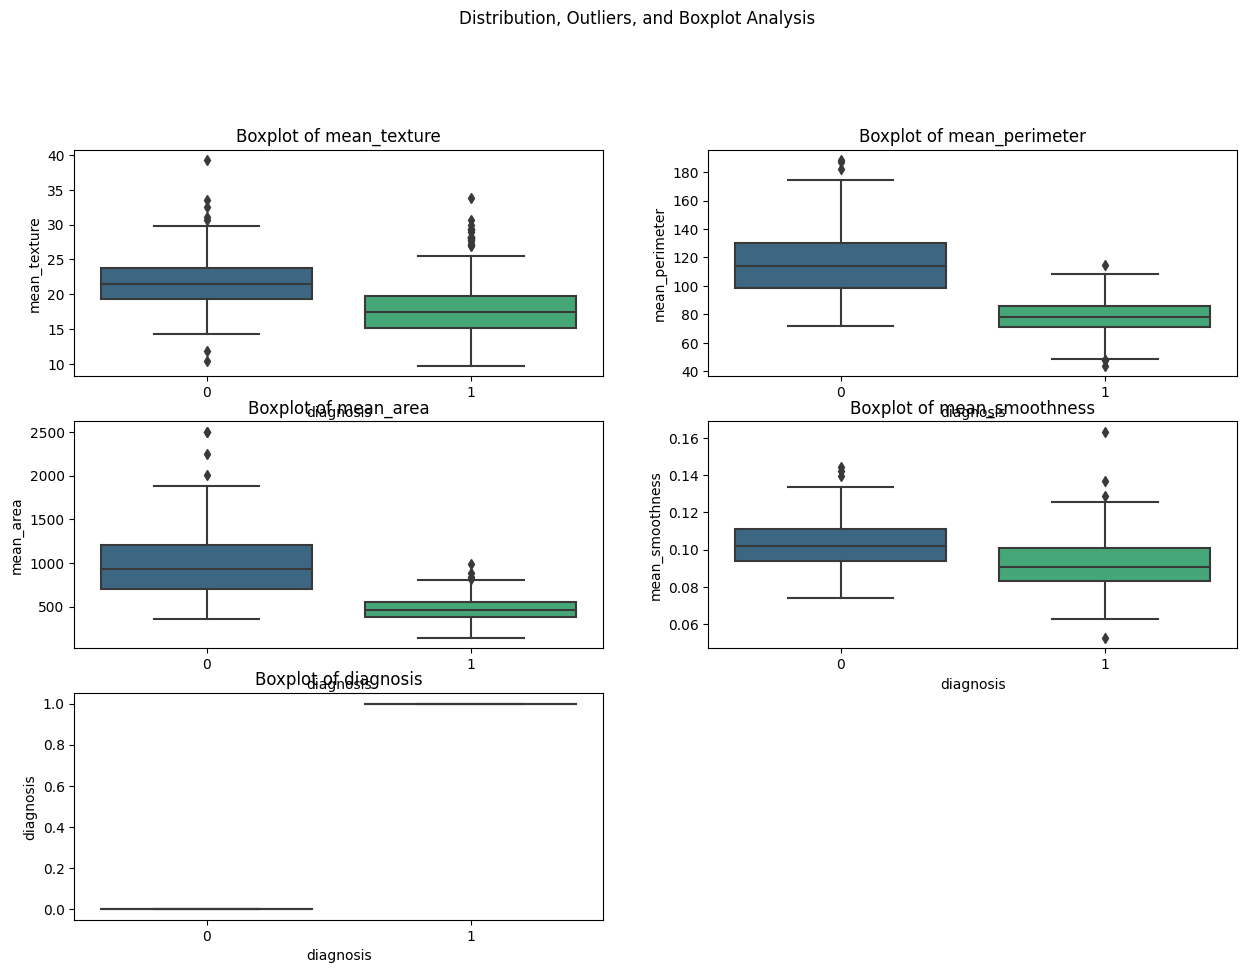

In [34]:
# Boxplot ile outliers olup olmadığını kontrol edersek:
plt.figure(figsize=(15, 10))
for i, feature in enumerate(df.columns[1:6], start=1):
    plt.subplot(3, 2, i)
    sns.boxplot(x='diagnosis', y=feature, data=df, palette='viridis')
    plt.title(f'Boxplot of {feature}')
    
    plt.suptitle("Distribution, Outliers, and Boxplot Analysis", y=1.02)
plt.show()

In [35]:
# Inferentiel istatistik için genel değerleri inceleyelim:
print(df.describe())

       mean_radius  mean_texture  mean_perimeter    mean_area  \
count   569.000000    569.000000      569.000000   569.000000   
mean     14.127292     19.289649       91.969033   654.889104   
std       3.524049      4.301036       24.298981   351.914129   
min       6.981000      9.710000       43.790000   143.500000   
25%      11.700000     16.170000       75.170000   420.300000   
50%      13.370000     18.840000       86.240000   551.100000   
75%      15.780000     21.800000      104.100000   782.700000   
max      28.110000     39.280000      188.500000  2501.000000   

       mean_smoothness   diagnosis  
count       569.000000  569.000000  
mean          0.096360    0.627417  
std           0.014064    0.483918  
min           0.052630    0.000000  
25%           0.086370    0.000000  
50%           0.095870    1.000000  
75%           0.105300    1.000000  
max           0.163400    1.000000  


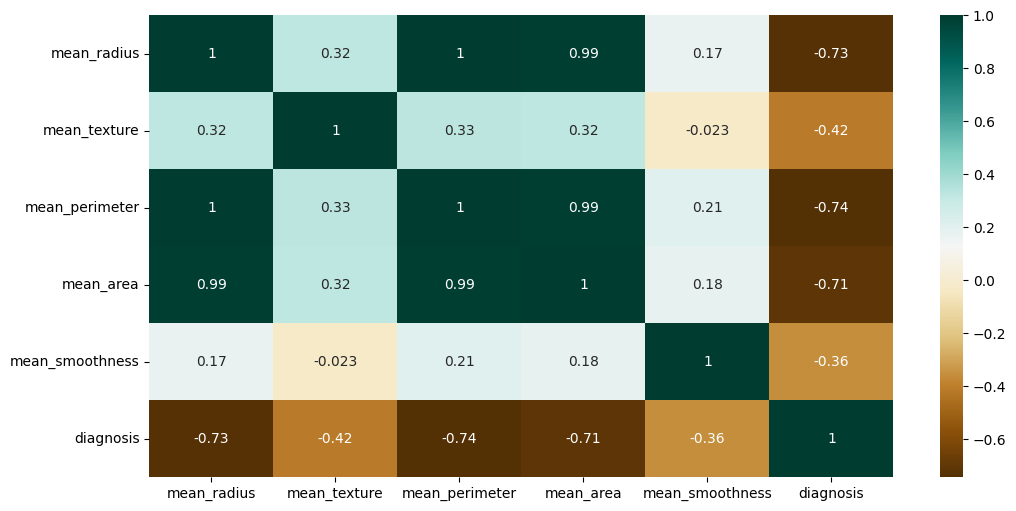

In [36]:
#corelasyonları daha net görmek için:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(), annot=True, cmap = 'BrBG')
plt.show()

Tüm bu görselleştirmelere baktığımda boxplot ve dağılımlardan aykırı değerlerim olduğunu görüyorum. Ama bu değerleri teker teker çıkarmadım, sonucumu fazla etkilemedikleri kanısındayım. Bunun yerine korelasyonu fazla olan değişkenlerden eleme yapacağım. mean_radius hem perimeter hem de area ile 0.99 oranında ilişkili. Değişkenlerimin bağımsız olması doğru model oluşturmam için önemli, diğer türlü sapma gerçekleşecek. Bu nedenle perimeter ve area değişkenlerini eleyerek modellerimi oluşturacağım.

In [37]:
df1 = df.drop(columns = ['mean_perimeter', 'mean_area'], axis = 1)
df1

,mean_radius,mean_texture,mean_smoothness,diagnosis
0,17.99,10.38,0.11840,0
1,20.57,17.77,0.08474,0
2,19.69,21.25,0.10960,0
3,11.42,20.38,0.14250,0
4,20.29,14.34,0.10030,0
...,...,...,...,...
564,21.56,22.39,0.11100,0
565,20.13,28.25,0.09780,0
566,16.60,28.08,0.08455,0
567,20.60,29.33,0.11780,0


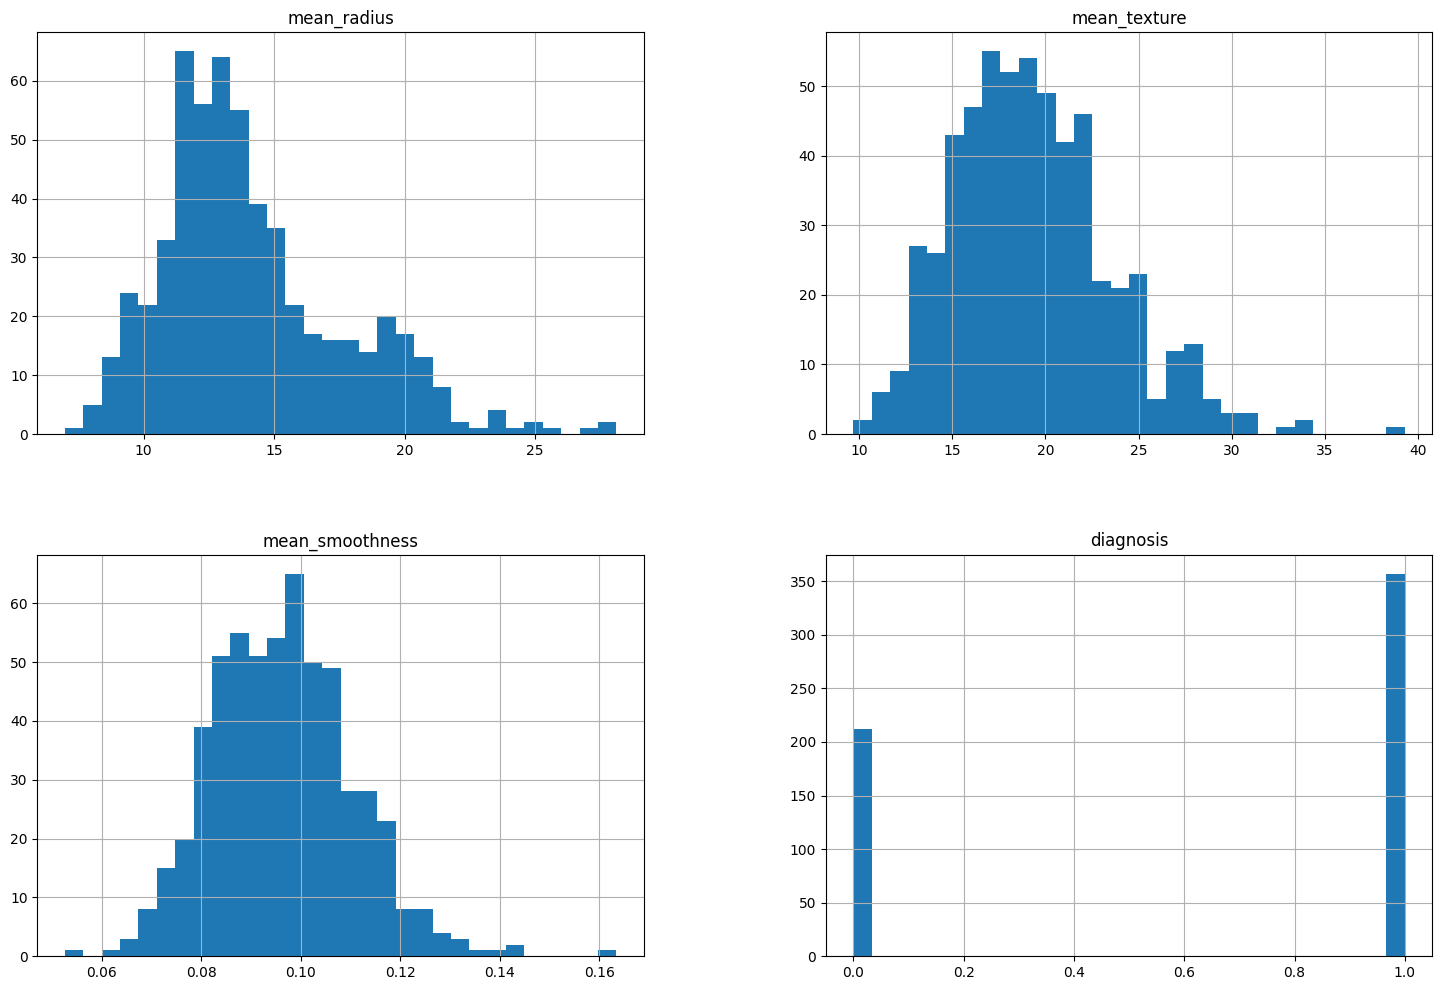

In [38]:
#Son durumda data'larımızını dağılımı şu şekilde olacaktır:

df1.hist(bins=30, figsize=(18,12))
plt.show()

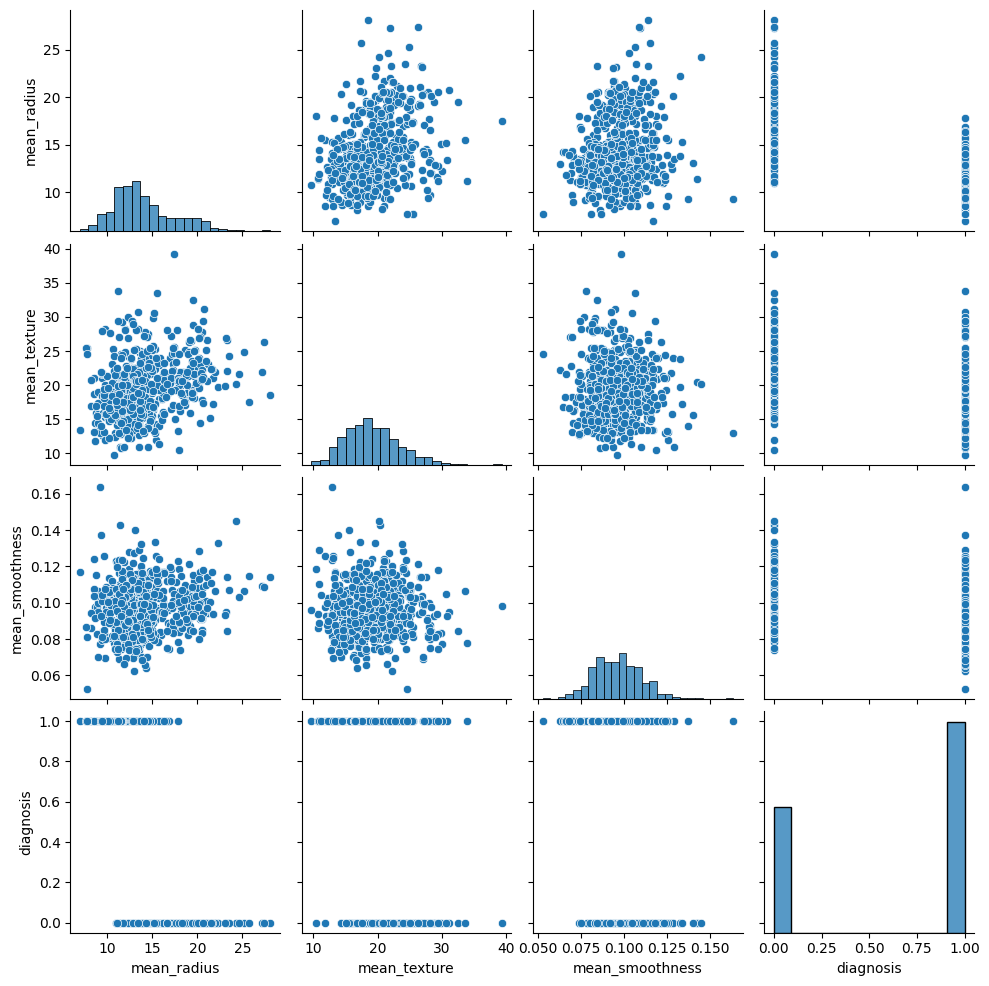

In [39]:
# şimdi korelasyonları tekrar incelediğimizde sapmaya neden olacak güçlü ilişkiler olmadığını görüyoruz. 
sns.pairplot(df1)
plt.show()

In [40]:
#tüm bu Inferentiel Stats yöntemleri ile incelediğimiz ve düzenlediğimiz data setimiz için test kümesi ve eğitim ümesini oluşturarak modellemeler için bir başlangıç oluşturalım:
X = df1.iloc[:,:-1].values
y = df1.iloc[:,-1].values

In [41]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=0)

In [42]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [43]:
print(X_train.shape)
print(X_test.shape)

(455, 3)
(114, 3)


In [44]:
#LogisticRegression ile modelimizi eğitelim:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [45]:
y_pred = classifier.predict(X_test)

In [46]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[42  5]
 [ 5 62]]
0.9122807017543859


In [47]:
#(Artificial Neural Network) ile modeli eğitme

import tensorflow as tf
import keras
from keras.layers import Dense, Dropout
from keras.models import Sequential

In [48]:
model = Sequential()

In [49]:
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 3, activation = 'relu'))
model.add(Dropout(0.25))
model.add(Dense(units = 1, activation = 'sigmoid'))

In [50]:
## compile the model
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [51]:
from keras.callbacks import EarlyStopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, verbose=1)
deep_history = model.fit(X_train, 
                              y_train, 
                              epochs=100,
                              batch_size = 32,
                              validation_data = (X_test, y_test),
                              callbacks=[early_stop]
                            )

Epoch 1/100
15/15 [==============================] - 1s 12ms/step - loss: 0.6805 - accuracy: 0.5143 - val_loss: 0.6717 - val_accuracy: 0.4474
Epoch 2/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6645 - accuracy: 0.5604 - val_loss: 0.6554 - val_accuracy: 0.5877
Epoch 3/100
15/15 [==============================] - 0s 4ms/step - loss: 0.6656 - accuracy: 0.5626 - val_loss: 0.6401 - val_accuracy: 0.6667
Epoch 4/100
15/15 [==============================] - 0s 5ms/step - loss: 0.6358 - accuracy: 0.6615 - val_loss: 0.6260 - val_accuracy: 0.8246
Epoch 5/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6154 - accuracy: 0.7297 - val_loss: 0.6124 - val_accuracy: 0.8421
Epoch 6/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6203 - accuracy: 0.7121 - val_loss: 0.5991 - val_accuracy: 0.8509
Epoch 7/100
15/15 [==============================] - 0s 3ms/step - loss: 0.6087 - accuracy: 0.7297 - val_loss: 0.5866 - val_accuracy: 0.8596
Epoch 8/100


In [55]:
y_pred = model.predict(X_test)

4/4 [==============================] - 0s 2ms/step


In [56]:
y_pred = (y_pred>0.5)

In [57]:
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[42  5]
 [ 3 64]]
0.9298245614035088


In [53]:
#Decision Tree ile Modeli Eğitme
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [54]:
y_pred = dtc.predict(X_test)
from sklearn.metrics import confusion_matrix, accuracy_score
cm = confusion_matrix(y_test, y_pred)
print(cm)
print(accuracy_score(y_test, y_pred))

[[43  4]
 [ 7 60]]
0.9035087719298246


Artificial Neural Network, Decision Tree ve Logistic Regresyon modellerinin accurency değerlerine baktığımızda Neural Network'ün bu data setinde daha iyi sonuç verdiğini gözlemliyoruz.